In [ ]:
8from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
from skimage import exposure
from skimage.transform import match_histograms

# Testing out

In [ ]:
i1 = Image.open("sanaa_1_022015.jpg")
i2 = Image.open("sanaa_1_052015.jpg")
assert i1.mode == i2.mode, "Different kinds of images."
assert i1.size == i2.size, "Different sizes."
 
pairs = zip(i1.getdata(), i2.getdata())
if len(i1.getbands()) == 1:
    # for gray-scale jpegs
    dif = sum(abs(p1-p2) for p1,p2 in pairs)
else:
    dif = sum(abs(c1-c2) for p1,p2 in pairs for c1,c2 in zip(p1,p2))
ncomponents = i1.size[0] * i1.size[1] * 3
print("Difference (percentage):{}".format((dif / 255.0 * 100) / ncomponents))


Difference (percentage):8.165791507723698


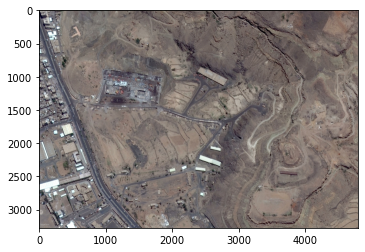

In [ ]:
from PIL import Image, ImageChops

point_table = ([0] + ([255] * 255))

def black_or_b(a, b):
    diff = ImageChops.difference(a, b)
    diff = diff.convert('L')
    diff = diff.point(point_table)
    new = diff.convert('RGB')
    new.paste(b, mask=diff)
    return new

a = Image.open("sanaa_1_022015.jpg")
b = Image.open("sanaa_1_052015.jpg")
c = black_or_b(a, b)
plt.imshow(b)
plt.imshow(c)
plt.show()

In [ ]:
import cv2
src1 = cv2.imread("sanaa_1_022015.jpg")
src2 = cv2.imread("sanaa_1_052015.jpg")
dif = cv2.subtract(src1, src2)
cv2.imwrite("sanaa_1_dif.jpg", dif)

True

In [ ]:
import cv2
src1 = cv2.imread("sanaa_1_022015.jpg", 0)
src2 = cv2.imread("sanaa_1_052015.jpg", 0)
dif = cv2.subtract(src1, src2)
cv2.imwrite("sanaa_1_dif_gs.jpg", dif)

True

In [ ]:
def image_difference_per(img1, img3, t_up=0.8, t_down=0.7) :
  img_diff = np.ndarray(shape=img1.shape, dtype='float32')
  img_diff = img1 / img3
  placement = (img_diff > t_down) * (img_diff < t_up)

  return img_diff, placement

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.transform.match_histograms has been moved to skimage.exposure.match_histograms. It will be removed from skimage.transform in version 0.18.
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


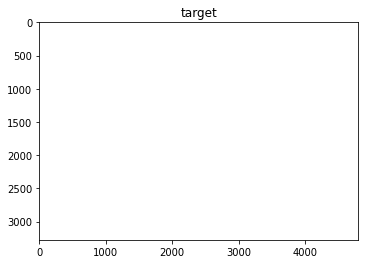

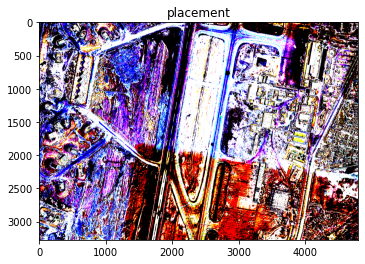

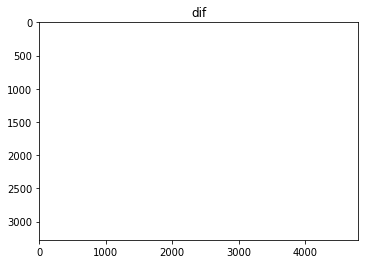

True

In [ ]:
file_name = 'sanaa_airport'
src = cv2.imread('{}_032014.jpg'.format(file_name))
target = cv2.imread('{}_032019.jpg'.format(file_name))
matched = match_histograms(src, target, multichannel=True)
t_up = 196
t_down = 128
dif, dif_placement = image_difference(matched, target, t_up, t_down)
plot1 = plt.figure(1)
plt.title("target")
plt.imshow(target)
plt.imshow(dif)
plot3 = plt.figure(3)
plt.title("placement")
plt.imshow(dif * dif_placement)
plot4 = plt.figure(4)
plt.title("dif")
plt.imshow(dif)

plt.show()

cv2.imwrite("{}_dif_{}_{}.jpg".format(file_name, t_up,t_down), dif * dif_placement)

In [ ]:
from PIL import Image, ImageChops
import numpy as np
import matplotlib.pyplot as plt
 
src = Image.open('sanaa_airport_032014.jpg')
target = Image.open('sanaa_airport_032019.jpg')

dif = ImageChops.difference(src, target)
dif_array = np.asarray(dif)
# placement = dif_array > 90

dif_array = dif_array * placement
print(dif_array)
plot1 = plt.figure(1)
plt.imshow(Image.fromarray(dif_array))
plot2 = plt.figure(2)
plt.imshow(img2)
plt.show()

In [ ]:
import os
import cv2

for image_file in sorted(os.listdir()):
  if "src" in image_file :
    img = cv2.imread(image_file)
    i = image_file.split('_')[1].split('.')[0]
    print(i)

2


# Locating Differences in time

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
from skimage import exposure
from skimage.transform import match_histograms
from skimage.filters import rank
from skimage.morphology import disk

## Color matching

Matching colors using histograms and their exposures

In [ ]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

In [ ]:
file_name = 'sanaa_2'
src = cv2.imread('{}_052015.jpg'.format(file_name))
# target = cv2.imread('{}_102015.jpg'.format(file_name))
print(src.shape)
if len(src.shape) > 2 :
  src = histogram_equalization(src)
  target = histogram_equalization(target)
else :
  src = cv2.equalizeHist(src)
  target = cv2.equalizeHist(target)

  
matched = match_histograms(src, target, multichannel=True)

plot1 = plt.figure(1)
plt.title("target")
plt.imshow(target)
plot2 = plt.figure(2)
plt.title("src")
plt.imshow(src)
plot3 = plt.figure(3)
plt.title("matched")
plt.imshow(matched.astype('uint8'))

plt.show()

cv2.imwrite("{}_matched.jpg".format(file_name), matched)
cv2.imwrite("{}_target_matched.jpg".format(file_name), target)

(3276, 4800, 3)


NameError: ignored

## Locating differences

In [ ]:
def image_difference(img1, img3, t_up=196, t_down=128) :
  img_diff = np.ndarray(shape=img1.shape, dtype='float32')
  img_diff.fill(128)
  img_diff += (img1 - img3)
  img_diff -= img_diff.min()
  img_diff *= (255/img_diff.max())
  # plt.imshow(PIL.Image.fromarray((img_diff).astype(np.uint8)))
  # plt.imshow(PIL.Image.fromarray(img_diff))
  # plt.show()
  placement = (img_diff > t_down) * (img_diff < t_up)

  return img_diff, placement

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


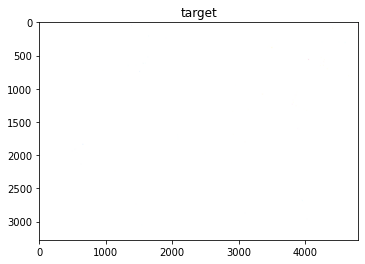

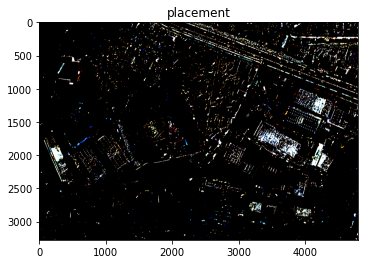

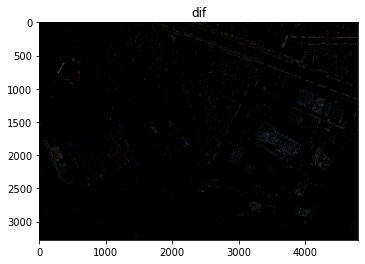

True

In [ ]:
t_up = 255
t_down = 205
dif, dif_placement = image_difference(matched, target, t_up, t_down)
plot1 = plt.figure(1)
plt.title("target")
plt.imshow(target)
plt.imshow(dif)
plot3 = plt.figure(3)
plt.title("placement")
plt.imshow(dif * dif_placement)
plot4 = plt.figure(4)
plt.title("dif")
plt.imshow(target * dif_placement)

plt.show()

cv2.imwrite("{}_dif_{}_{}.jpg".format(file_name, t_up,t_down), target * dif_placement)

In [ ]:
print(os.listdir())

['.config', 'sanaa_2_052015.jpg', 'sanaa_3_052015.jpg', 'sanaa_2_matched.jpg', 'sanaa_2_target_matched.jpg', 'sanaa_3_dif_255_229.jpg', 'sanaa_3_dif_250_180.jpg', 'sanaa_3_dif_255_200.jpg', 'sanaa_2_102015.jpg', 'sanaa_2_dif_255_205.jpg', 'sanaa_3_dif_255_0.jpg', 'sanaa_2_dif_250_180.jpg', 'sanaa_3_092013.jpg', 'sanaa_2_dif_250_200.jpg', 'sanaa_3_target_matched.jpg', 'sanaa_3_matched.jpg', 'sample_data']
